# Modelo de Respiración basado en sistemas VCON.

In [37]:
using TaylorSeries

In [38]:
println(VERSION)

using Compat

0.4.1


In [3]:
using PyPlot

La respiración en humanos es controlada por neuronas que excitan a los músculos del diafragma a que se contraigan.
Hay músculos para la inspiración y la exhalación. Hay mecanoreceptores $MR$ que incluyen a los receptores de estiramiento pulmonar que se encargan de inhibir a las neuronas que controlan los músculos inspiratorios diafragma.

El diafragma se modela como un sistema mecánico de un resorte  con una fuerza de fricción y una fuerza restitutiva. Si $z$ denota la contracción del diafragma y se parte del reposo, entonces $z$ satisface la ecuación:
$$m\frac{d^2z}{dt^2}+r\frac{dz}{dt}+kz=F \ \ (1)$$
donde $m$ es la masa del diafragma, r es el coeficiente de resistencia, $k$ mide la fuerza restitutiva y $F$ es la fuerza externa aplicada al diafragma por músculos que reciben señales de las neuronas inspiratorias y expiratorias.
El circuito mecánico equivalente a este sistema mecánico es un circuito $RCL$, donde la fuerza externa se reemplaza por una fuerza electromotriz. Se utilizan diodos rectificadores para simular la barrera de potencial que cuando es superada activa los músculos.

Las relaciones entre los mecanorecptores, las neuronas inspiratorias, las neuronas expiratorias y el diafragma puede ser modelada mediante el siguiente sistema de ecuaciones:

$$\frac{dx_{in}}{dt}=\omega_0+ P[Acos(x_{in})+\alpha-H \ Acos_+(x_{MR})]$$

$$\frac{dx_{ex}}{dt}=\omega_0+ Acos(x_{ex})+\alpha-H \ Acos_+(x_{in})$$

$$ \frac{dx_{MR}}{dt}=\omega_0+ P[Acos(x_{MR})+H \ z_+]$$

$$m\frac{d^2z}{dt}+\frac{dz}{dt}=-kz+B \ A cos_+(x_{in}) - B \ Acos_+(x_{ex}) \ \ (2)$$ 


$d$ indica la parte positiva de la función.
La sinapsis característica la tomamos como $P(v)=tanh(v)$ 

donde $x_{ex}:=$ fase de las neuronas exhalatorias

$x_{in}:=$ fase de las neuronas inhalatorias

$x_{MR}:=$ fase de los mecano-receptores 

$z:=$ contracción del diafragma partiendo del reposo

$\omega_0:=$ frecuencia las neuronas

$A:=$ amplitud de  la señal de salida de las neuronas

$B:=$ transducción característica

$H:=$ sinapsys efectiva

$\alpha:=$ excitación


Los términos en una misma ecuación con la misma fase son los términos de retroalimentación, los otros términos son de acoplamiento.

La transducción de señal ocurre cuando una molécula de señalización extracelular activa un receptor de superficie de la célula. A su vez, este receptor altera moléculas intracelulares creando una respuesta. [1]

La respiración mientras corremos.

Correr causa una carga periódica sobre el diafragma, entonces podemos modelar la ecuación para $z$ de la siguiente manera: $$m\frac{d^2z}{dt^2}+r\frac{dz}{dt}+kz=F+p(t)$$

Vamos a estudiar las atenuaciones como respuesta a una fuerza externa.

El radio de cambio de respiración, es el radio entre el monto de oxígeno consumido $0_2$ y el dióxido de carbono $CO_2$ producido en una respiración. Típicamente los humanos inhalan más moléculas de oxígeno que las que exhalan de dióxido de carbono. [2]

Un ciclo "phase locked (PLL)" es un sistema de control que genera una señal de salida cuya fase está relacionada con la fase de una señal de entrada. Como hay de diferentes tipos, es fácil visualizar un circuito electrónico que consiste de un oscilador de frecuencia variable y un detector. El oscilador  genera una señal periódica. El detector de fase compara la fase de de la señal de salida con la de entrada y ajusta al oscilador para mantener parejas las fases.
Se le llama "feedback loop" a la comparación entre la señal de entrada y la de salida. 

Mantener la señal de entrada y de salida en "lock step" implica que las frecuencias de entrada y de salida son las mismas.

El "phase locking" entre paso y respiración puede ser estudiado usando el sistema de ecuaciones (2) pero agregando una carga periódica en el diafragma.

Introducimos coordenadas polares en la ecuación por $z$, 


$$\frac{dz}{dt}=\frac{1}{m}(u-z)$$

$$\frac{du}{dt}=-kz+F \ \ \ (3)$$

tomamos $z=Z$ y $u=\frac{U}{\sqrt{km}}$


$$\frac{dz}{dt}=\frac{1}{m}(u-z)$$

$$\frac{du}{dt}=-kz+F \ \ \ (4)$$


El resultado es:





$$\frac{dZ}{dt}=\omega U -\frac{Z}{m}$$

$$\frac{dU}{dt}=-\omega z+\frac{F}{\sqrt{km}}$$

Ahora, tomamos $z=r\cos(\phi), U=r\sin(\phi)$, entonces:

$$\frac{dr}{dt}=-\frac{1}{m}r\cos(\phi)+\frac{F}{\sqrt{km}}sin(\phi)$$

$$\frac{d\phi}{dt}=-\omega+\frac{F}{r \sqrt{km}}cos(\phi)-\frac{1}{m}sin(\phi)cos(\phi) \ \ \ (5)$$





[4]



Ahora, para resolver estas ecuaciones diferenciales, necesitaremos algunas funciones entre tipos Taylor1 que necesitaremos para esolver nuestras ecuaciones diferenciales como: $tanh(x)=\frac{ e^ x - e ^{-x} }{ e^x + e ^{-x} }$, valor absoluto y la parte positiva de una función $V(x)$ que está dada por:$ V_+(x) =\frac{V(x)+|V(x)|}{2}$.

In [4]:
import Base.tanh
import Base.abs

4.1


In [5]:
tanh(b::Taylor1)=(exp(b)-exp(-b))/(exp(b)+exp(-b))

tanh (generic function with 14 methods)

In [6]:
abs(c::Taylor1)=(c^2)^0.5

abs (generic function with 32 methods)

In [7]:
p_f(f)=(abs(f)+f)/2.0

p_f (generic function with 1 method)

Ahora probemos la función parte positiva con el coseno:

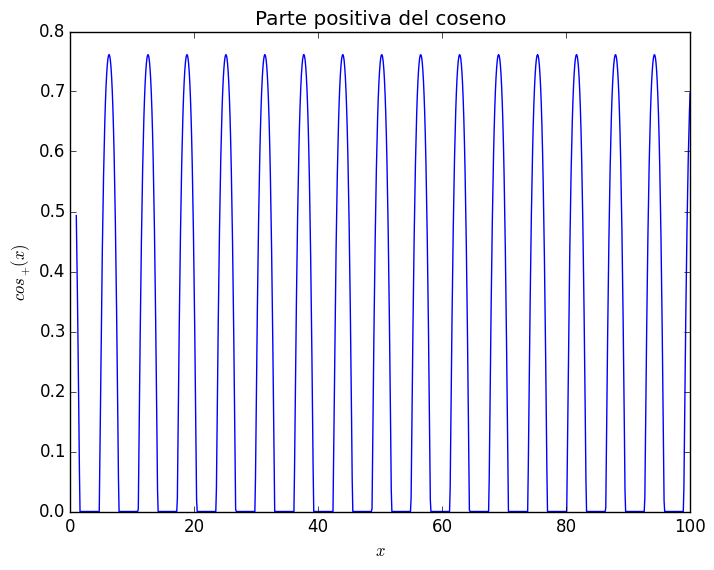

In [8]:
dieg=1:.1:100
aix=[tanh(p_f(cos(i))) for i in dieg];
mari=[(((cos(i))^2)^0.5 +cos(i))*0.5 for i in dieg]
plot(dieg,aix)
title("Parte positiva del coseno")
ylabel(L"cos_+(x)")
xlabel(L"x")
legend();

También definimos las funciones que nos van a ayudar a integrar nuestras ecuaciones, estas funciones son: $paso$ que nos da el paso de integración, $evaluador$ que evalúa el polinomio de Taylor a cada paso e $ Integrador\_1$ que integra las ecuaciones diferencial que se expanden en polinomios de Taylor.

In [9]:
function paso{T<:Real}(x::Taylor1{T}, epsilon::Float64)
    k = x.order
    h = 1.0
    for i in [k-1, k]
        aux = abs( x.coeffs[i+1] )
        h = min(h, (epsilon/aux)^(1.0/i))
    end
    return h 
end

paso (generic function with 1 method)

In [10]:

function evaluador{T<:Number}( Eqs::Function, vec0::Array{T,1}, N::Int, epsilon::Float64, t::Float64)
    
    n = length(vec0)
    vec1T = Eqs(vec0, N, t)
    hh = vec0
    for i in eachindex(vec1T)
        hh[i] = paso(vec1T[i], epsilon)
    end
    hfin = hh[1]
    for i in eachindex(hh)
        hfin = min(hfin,hh[i])
    end
    for i=1:n
        vec0[i] = evaluate(vec1T[i], hfin)
    end
    
    return hfin, vec0
end

evaluador (generic function with 1 method)

In [11]:
function Integrador_1(t_max::Float64, Eqs::Function, epsilon::Float64, N::Int,xin0, xex0, xMR0, r0, ϕ0)
    t0 = 0.0
    tV, xinV, xexV, xMRV, rV, ϕV = Float64[], Float64[], Float64[], Float64[], Float64[], Float64[]
    push!(tV, t0)
    push!(xinV, xin0)
    push!(xexV, xex0)
    push!(xMRV, xMR0)
    push!(rV, r0)
    push!(ϕV, ϕ0)
    dt = 1.0
    while t0 < t_max && dt>1.0e-8
         dt, res = evaluador(Eqs, [xin0, xex0, xMR0, r0, ϕ0], N, epsilon, t0)
        t0 += dt
        push!(tV,t0)
        push!(xinV,res[1])
        push!(xexV,res[2])
        push!(xMRV,res[3])
        push!(rV,res[4])
        push!(ϕV,res[5])
        xin0, xex0, xMR0, r0, ϕ0 = res[1], res[2], res[3], res[4], res[5]
    end
  return tV, xinV, xexV, xMRV, rV, ϕV
end

Integrador_1 (generic function with 1 method)

Ahora definimos la función $Running$ en la que definimos las ecuaciones diferenciales del sistemade ecuaciones $5$ combinado con el sistema de ecuaciones $2$.

In [12]:
function Running{T<:Real}(vec::Array{T,1} , N::Int, t::Float64) 
    xinT = Taylor1(vec[1], N)
    xexT = Taylor1(vec[2], N)
    xMRT = Taylor1(vec[3], N)    
    rT = Taylor1(vec[4], N)
    ϕT = Taylor1(vec[5], N)    

    for k = 0:N-1
        knext = k+1
        xinTt = Taylor1( xinT.coeffs[1:k+1], k)
        xexTt = Taylor1( xexT.coeffs[1:k+1], k)
        xMRTt = Taylor1( xMRT.coeffs[1:k+1], k)
        rTt = Taylor1( rT.coeffs[1:k+1], k)
        ϕTt = Taylor1( ϕT.coeffs[1:k+1], k)
        # Las ecuaciones de movimiento, determinadas
        cxin = cos(xinTt)
        cxex = cos(xexTt)
        cxMR = cos(xMRTt)
        z = rTt*cos(ϕTt)
        ap1 = (((cxMR^2)^0.5)+cxMR)/2.0
        ap2 = (((cxin^2)^0.5)+cxin)/2.0
        ap3 = (((cxex^2)^0.5)+cxex)/2.0
        ap4 = (((z^2)^0.5)+z)/2.0
        Dxin = 0.8808+((exp(2.0*(cxin+1.0-5.0*ap1))-1.0)/((exp(2.0*(cxin+1.0-5.0*ap1))+1.0)))
        Dxex = 0.8808+(cxex+1.0-5.0*ap2)
        DxMR = 0.8808+((exp(2.0*(cxMR+5.0*ap4))-1.0)/((exp(2.0*(cxMR+5.0*ap4))+1.0)))
        Dr = -((z^2)/(20.0*rTt))+sin(ϕTt)*50.0*(ap2-ap3)/((20.0)^0.5)
        Dϕ = -0.2236+cos(ϕTt)*50.0*(ap2-ap3)/(rTt*((20.0)^0.5))-sin(ϕTt)*cos(ϕTt)/20.0
       
        xinT.coeffs[knext+1]  = Dxin.coeffs[knext] / knext
        xexT.coeffs[knext+1]  = Dxex.coeffs[knext] / knext
        xMRT.coeffs[knext+1]  = DxMR.coeffs[knext] / knext
        rT.coeffs[knext+1]  = Dr.coeffs[knext] / knext
        ϕT.coeffs[knext+1]  = Dϕ.coeffs[knext] / knext
    end
    
    return Taylor1[xinT, xexT, xMRT, rT, ϕT]
end

Running (generic function with 1 method)

La función z devuelve la posición del diafragma $z$ como función del tiempo:

In [13]:
 function z(t_max::Float64, Eqs::Function, epsilon::Float64, N::Int,xin0, xex0, xMR0, r0, ϕ0)
   rest, resxin, resxex, resxMR, resr, resϕ = Integrador_1(t_max::Float64, Eqs::Function, epsilon::Float64, N::Int,xin0, xex0, xMR0, r0, ϕ0)
   Z = resr
    for i in eachindex(resr)
    Z[i] = resr[i]*cos(resϕ[i])
end
    hcat(rest,Z)
end

z (generic function with 1 method)

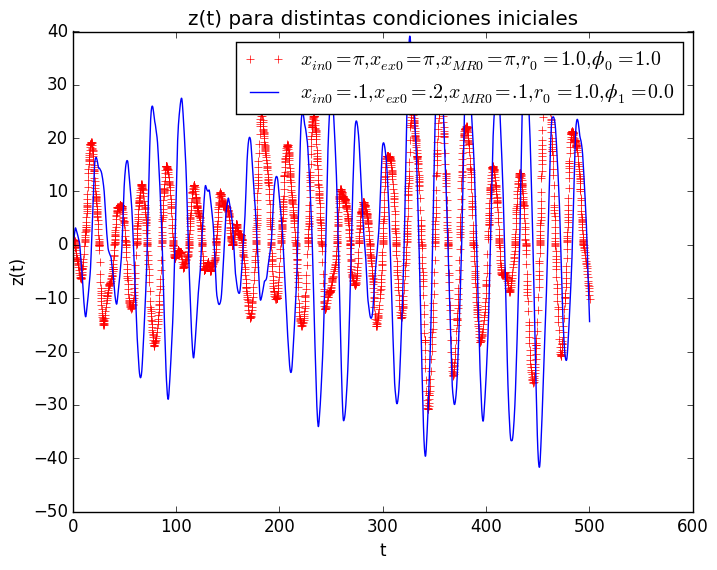

In [14]:
hola=z(500.0,Running,10.0^(-10),20,.1,.2,.1,1.0,1.0);
hola1=z(500.0,Running,10.0^(-10),20,π,π,π,1.0,0.0);
plot(hola1[:,1],hola1[:,2],label=L"$ x_{in0}=\pi, x_{ex0}=\pi ,x_{MR0}=\pi, r_0=1.0, ϕ_0=1.0$","r+")
plot(hola[:,1],hola[:,2],label=L"$ x_{in0}=.1, x_{ex0}=.2, x_{MR0}=.1, r_0=1.0, ϕ_1=0.0$")
title("z(t) para distintas condiciones iniciales")
xlabel("t")
ylabel("z(t)")

legend();

Podemos ver que $z$ depende mucho de las condiciones iniciales, entre mayor sea el valor de éstas, menor será la amplitud de $z$.

Ahora modelamos la respiración de una mamífero con una fuerza aplicada sobre el diafragma $p(t)$, utilizando las siguientes ecuaciones:

$$\frac{d x_MR}{dt}=3-4\cos x_{MR} +10 D_+$$

$$\frac{X_{in}}{dt}=3-2\cos x_{in} -4cos_+ x_{MR}$$

$$\frac{dx_{ex}}{dt}=2.5-2\cos{x_{ex}}-4cos_+ x_{in}$$

$$m\frac{d^2D}{dt^2}+\frac{dD}{dt}+D=F$$

$$F=5\tanh \cos_+ x_{in}-cos_+ x_{ex}+ p(t) \ \ \ \ \ \ (6)$$

Donde $D$ es la deflexión del diafragma, $D$ es equivalente a $z$ y $p(t)$ es una fuerza externa, en este caso simula a una persona corriendo.

Para esta simulación $A=1$.   [5]

Y para utilizar el $integrador\_1$ hacemos $\frac{dD}{dt}=r$, entonces $m\dot{r}+r+D=F$. Estas ecuaciones la implementamos en la función $resp\_2$ con $p(t)=120\cos(.5t), m=1$.


In [57]:
function resp_2 {T<:Real}(vec::Array{T,1} , N::Int, t::Float64)
    xinT = Taylor1(vec[1], N)
    xexT = Taylor1(vec[2], N)
    xMRT = Taylor1(vec[3], N)    
    rT = Taylor1(vec[4], N)
    DT = Taylor1(vec[5], N) 
    for k = 0:N-1
        knext = k+1
        xinTt = Taylor1( xinT.coeffs[1:k+1], k)
        xexTt = Taylor1( xexT.coeffs[1:k+1], k)
        xMRTt = Taylor1( xMRT.coeffs[1:k+1], k)
        rTt = Taylor1( rT.coeffs[1:k+1], k)
        DTt = Taylor1( DT.coeffs[1:k+1], k)
        p_in=p_f(cos(xinTt)) 
        p_ex=p_f(cos(xexTt))
        p_MR=p_f(cos(xMRTt))
        p_z=p_f(DTt) #parte positiva del coseno
       
        F=5*tanh(p_in-p_ex)
        DxMR =3-4*cos(xMRTt)+10*p_z
        Dxin =3-2*cos(xinTt)-4*p_MR   #ahora sólo sustituimos las ecuaciones diferenciales
        Dxex =2.5-2*cos(xexTt)-4*p_in
        Dr=(-rTt-DTt+F+120*cos(.5t))
        DD=rTt
        xinT.coeffs[knext+1]  = Dxin.coeffs[knext] / knext
        xexT.coeffs[knext+1]  = Dxex.coeffs[knext] / knext
        xMRT.coeffs[knext+1]  = DxMR.coeffs[knext] / knext
        rT.coeffs[knext+1]  = Dr.coeffs[knext] / knext
        DT.coeffs[knext+1]  = DD.coeffs[knext] / knext
    end
    
    return Taylor1[xinT, xexT, xMRT, rT, DT]
end


Use "resp_2{" instead.


resp_2 (generic function with 1 method)

In [58]:
rest1, resxin1, resxex1, resxMR1, resr1, resϕ1 = Integrador_1(500.0,resp_2,10.0^(-10),20,.1,.1,.1,10,10.0);

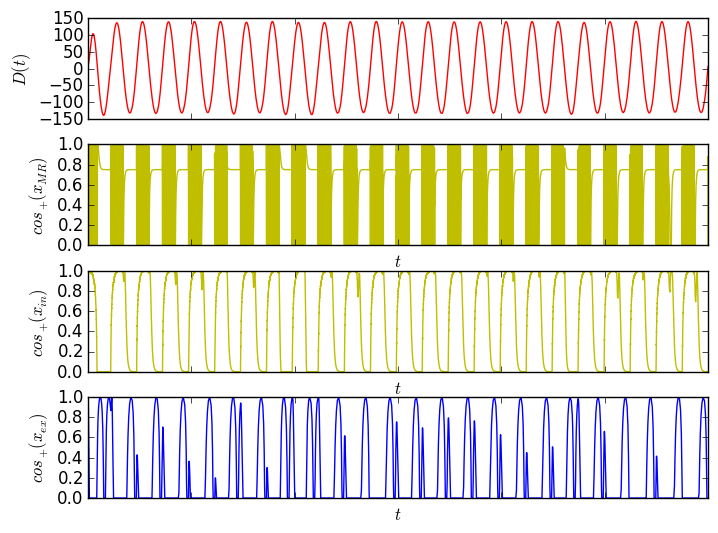

(0,300)

In [59]:
subplot(412)
ax2 = gca()
setp(ax2[:get_xticklabels](),visible=false) 
ylabel(L"$cos_+(x_{MR})$")
xlabel(L"$t$")
plot(rest1,p_f(cos(resxMR1)),"y-")
xlim([0,300])


subplot(413)
ax2 = gca()
setp(ax2[:get_xticklabels](),visible=false) 
ylabel(L"$cos_+(x_{in})$")
xlabel(L"$t$")
plot(rest1,p_f(cos(resxin1)),"y-")
xlim([0,300])

subplots_adjust(hspace=0.25)

subplot(411)
ax1 = gca()
setp(ax1[:get_xticklabels](),visible=false) 
ylabel(L"$D (t)$")
plot(rest1,resϕ1,"r-")
xlim([0,300])

subplot(414)
ax1 = gca()
setp(ax1[:get_xticklabels](),visible=false) 
plot(rest1,p_f(cos(resxex1)))
ylabel(L"$cos_+(x_{ex})$")
xlabel(L"$t$")
xlim([0,300])



Las gráficas anteriores muestra la inhalación, la exhalación, los mecanoreceptores y el diafragma acoplados como función del tiempo, las gráficas muestran el intervalo de tiempo de $[0,300]$. Podemos ver la inhibición de la inhalación respecto a la exhalación, también podemos ver que la fuerza externa que introdujimos es suficientemente grande para que dar un estímulo muy grande al diafragma y éste a su vez lo transmita a los mecanoreceptores. 

Ahora utilizaremos $p(t)=.5 \cos(.5t)$, $m=50$.

In [60]:
function resp_3{T<:Real}(vec::Array{T,1} , N::Int, t::Float64)
    xinT = Taylor1(vec[1], N)
    xexT = Taylor1(vec[2], N)
    xMRT = Taylor1(vec[3], N)    
    rT = Taylor1(vec[4], N)
    DT = Taylor1(vec[5], N) 
    for k = 0:N-1
        knext = k+1
        xinTt = Taylor1( xinT.coeffs[1:k+1], k)
        xexTt = Taylor1( xexT.coeffs[1:k+1], k)
        xMRTt = Taylor1( xMRT.coeffs[1:k+1], k)
        rTt = Taylor1( rT.coeffs[1:k+1], k)
        DTt = Taylor1( DT.coeffs[1:k+1], k)
        p_in=p_f(cos(xinTt)) 
        p_ex=p_f(cos(xexTt))
        p_MR=p_f(cos(xMRTt))
        p_z=p_f(DTt) 
        F=5*tanh(p_in-p_ex)
        DxMR =3-4*cos(xMRTt)+10*p_z
        Dxin =3-2*cos(xinTt)-4*p_MR   
        Dxex =2.5-2*cos(xexTt)-4*p_in
        Dr=(1/50)*(-rTt-DTt+.5*cos(.5*t))
        DD=rTt
        xinT.coeffs[knext+1]  = Dxin.coeffs[knext] / knext
        xexT.coeffs[knext+1]  = Dxex.coeffs[knext] / knext
        xMRT.coeffs[knext+1]  = DxMR.coeffs[knext] / knext
        rT.coeffs[knext+1]  = Dr.coeffs[knext] / knext
        DT.coeffs[knext+1]  = DD.coeffs[knext] / knext
    end
    
    return Taylor1[xinT, xexT, xMRT, rT, DT]
end

resp_3 (generic function with 1 method)

In [61]:
rest2, resxin2, resxex2, resxMR2, resr2, resϕ2 = Integrador_1(500.0,resp_3,10.0^(-10),20,.1,.1,.1,20,20.0);

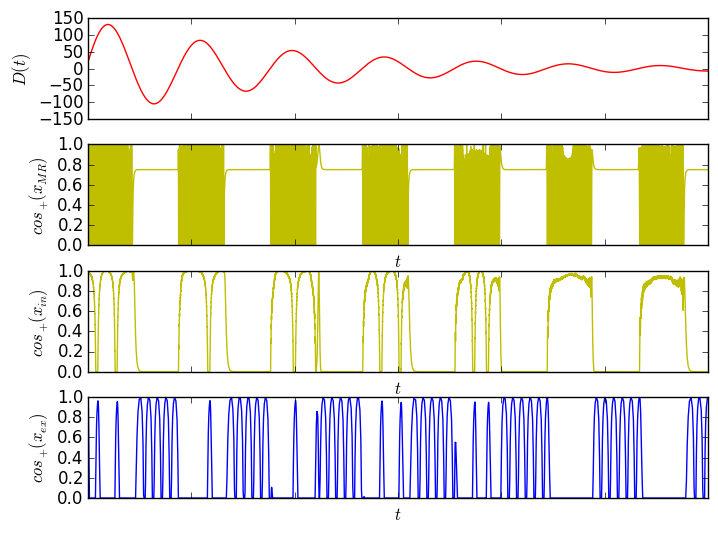

(0,300)

In [62]:
subplot(412)
ax3 = gca()
setp(ax3[:get_xticklabels](),visible=false) 
ylabel(L"$cos_+(x_{MR})$")
xlabel(L"$t$")
plot(rest2,p_f(cos(resxMR2)),"y-")
xlim([0,300])

subplot(413)
ax4 = gca()
setp(ax4[:get_xticklabels](),visible=false) 
ylabel(L"$cos_+(x_{in})$")
xlabel(L"$t$")
plot(rest2,p_f(cos(resxin2)),"y-")
xlim([0,300])
subplots_adjust(hspace=0.25)


subplot(411)
ax1 = gca()
setp(ax1[:get_xticklabels](),visible=false) 
ylabel(L"$D (t)$")
plot(rest2,resϕ2,"r-")
xlim([0,300])

subplot(414)
ax2 = gca()
setp(ax2[:get_xticklabels](),visible=false) 

plot(rest2,p_f(cos(resxex2)))
ylabel(L"$cos_+(x_{ex})$")
xlabel(L"$t$")
xlim([0,300])





A comparación de la otra gráfica para $p(t)=120\cos(.5t) y m=1$, encontramos que para una fuerza externa menor, se observa una inhalación muy pausada y hay un movimiento del diafragma muy pequeño comparado con el de un ritmo de inhalación acelerado. Se observa una respuesta inhibitoria de la inspiración respecto a la exhalación, pero el ritmo de inhalación y la respuesta del difragma disminuye con el tiempo.

### Referencias:

[1]https://es.wikipedia.org/wiki/Transducci%C3%B3n_de_se%C3%B1al

[2] https://en.wikipedia.org/wiki/Respiratory_exchange_ratio

[3]https://www.google.com.mx/url?sa=t&rct=j&q=&esrc=s&source=web&cd=3&cad=rja&uact=8&ved=0ahUKEwjav-fm1rTJAhUHWCYKHepVCsEQFggsMAI&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FPhase-locked_loop&usg=AFQjCNFoqJdVwjx2t5hNDUanbeKoMdZblw&sig2=SKKewfZFOKFbLvK7u1lEWA


[4]F.C.Hoppensteadt, An Introduction to the mathematics of neurons, Cambridge University Press.

[5]F.C.Hoppensteadt, C.S. Peskin, Methemathics in Medicine and the Life Sciences, Cambridge University Press.